In [13]:
figure_target_dir = "./Figures/Y_maze/"
data_target_dir = "./Data/processed_data/Y_maze/for_b_cpp_calculation/simulated_data/"
data_target_dir_ideal = "./Data/processed_data/Y_maze/ideal_observer/simulated_data/"
data_target_dir_cbgt = "./Data/processed_data/cbgt_nw/"


In [14]:
import glob
import numpy as np
import pickle
import seaborn as sns
import pylab as pl
import pandas as pd
from pickle_objects import save_object, load_object
import matplotlib.pyplot as plt

plt.rcParams["figure.facecolor"] = "w"


In [3]:
for_av_fits_hddm = pd.read_csv(data_target_dir_cbgt+"for_av_fits_hddm.csv")

In [11]:
for_av_fits_hddm["optimal_action"] = (for_av_fits_hddm["optimal"]==for_av_fits_hddm["chosen_action"]).astype(int)
for_av_fits_hddm["volatility"] = "High"
for_av_fits_hddm["volatility + optimal_action"] = for_av_fits_hddm["volatility"]+" - "+for_av_fits_hddm["optimal_action"].astype(str)
for_av_fits_hddm

,Unnamed: 0,Unnamed: 0.1,r_t0,r_t1,cp,epoch_number,reward_p_t0,seed,conflict,condition,...,trial_num,rt,cpp,ideal_B,b_t0,b_t1,MC,optimal_action,volatility,volatility + optimal_action
0,0,0,0.999029,0.000000,1.0,0,1.0,4881_26,Low,Control,...,0,561,0.024339,0.000000,0.000000e+00,0.000000,0.500000,0,High,High - 0
1,1,1,0.000000,1.001935,0.0,0,0.0,4881_26,Low,Control,...,1,687,0.021642,-0.012170,1.216962e-02,0.000000,0.661301,1,High,High - 1
2,2,2,1.005767,0.000000,0.0,0,1.0,4881_26,Low,Control,...,2,460,0.020454,-0.002947,7.873615e-03,0.010821,0.738793,0,High,High - 0
3,3,3,0.990541,0.000000,0.0,0,1.0,4881_26,Low,Control,...,3,442,1.000000,0.010108,1.793939e-02,0.007831,0.783190,1,High,High - 1
4,4,4,0.996887,0.000000,0.0,0,1.0,4881_26,Low,Control,...,4,508,1.000000,0.490541,9.905407e-01,0.500000,0.500000,0,High,High - 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,35,35,0.000000,1.017498,0.0,3,0.0,4834447_3,No,Control,...,35,488,0.021618,0.493208,5.000000e-01,0.993208,0.738366,1,High,High - 1
12396,36,36,0.000000,0.995640,0.0,3,0.0,4834447_3,No,Control,...,36,483,1.000000,0.499950,5.000000e-01,0.999950,0.781056,0,High,High - 0
12397,37,37,0.000000,0.988621,0.0,3,0.0,4834447_3,No,Control,...,37,423,1.000000,0.500000,2.220446e-16,0.500000,0.500000,1,High,High - 1
12398,38,38,0.000000,0.993008,0.0,3,0.0,4834447_3,No,Control,...,38,639,0.024064,0.488621,5.000000e-01,0.988621,0.500000,1,High,High - 1


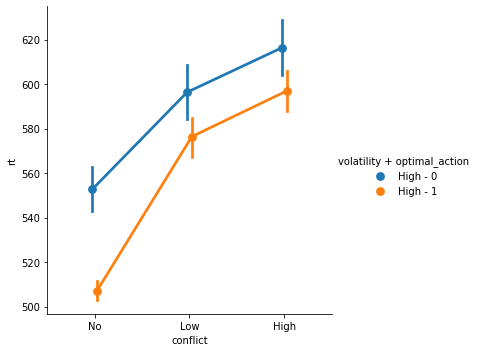

In [16]:
g5 = sns.catplot(x="conflict",y='rt',data=for_av_fits_hddm,hue="volatility + optimal_action",kind='point',dodge=True,order=["No","Low","High"])
g5.savefig(fig_target_dir+"reaction_times_all_response_wise_cbgt.png")